In [2]:
import requests
from bs4 import BeautifulSoup
import bs4
import pandas as pd
import numpy as np
from IPython.display import Image

### Go to rightmove.co.uk, search rental properties in Maidstone, and copy paste to replace the 'url' below

In [12]:
link = 'https://www.rightmove.co.uk/property-for-sale/find.html?searchType=SALE&locationIdentifier=REGION%5E70387&insId=1&radius=3.0&minPrice=&maxPrice=&minBedrooms=&maxBedrooms=3&displayPropertyType=flats&maxDaysSinceAdded=&_includeSSTC=on&sortByPriceDescending=&primaryDisplayPropertyType=&secondaryDisplayPropertyType=&oldDisplayPropertyType=&oldPrimaryDisplayPropertyType=&newHome=&auction=false'

acton_park_2beds_link = 'https://www.rightmove.co.uk/property-for-sale/find.html?locationIdentifier=REGION%5E70387&maxBedrooms=2&radius=0.25&propertyTypes=flat&primaryDisplayPropertyType=flats&includeSSTC=false&mustHave=&dontShow=&furnishTypes=&keywords='

In [13]:
bdrooms = []
addresses = []
rent = []

for start in range(0,480,24):
    url = acton_park_2beds_link.format(start)
    r = requests.get(url)
    soup = BeautifulSoup(r.text, "html.parser")
    
    for num in soup.find_all('h2', class_= 'propertyCard-title'):
        bdrooms.append(num.text.strip())
        
    for add in soup.find_all('address', class_="propertyCard-address"):
        for meta in add:
            for loc in meta:
                if type(loc) is bs4.element.NavigableString:
                    addresses.append(loc)
                    
    for pc in soup.find_all('div', 'propertyCard-priceValue'):
        rent.append(pc.string)

In [14]:
print(len(bdrooms))
print(bdrooms[:5])
print(len(addresses))
print(addresses[:5])
print(len(rent))
print(rent[:5])

500
['1 bedroom apartment for sale', 'Block of apartments for sale', '2 bedroom flat for sale', '2 bedroom apartment for sale', '2 bedroom flat for sale']
500
['Poulton Court, Victoria Road, W3', 'High Street, London, W3', 'The Green, London, W3', 'One West Point, Portal West, W3', 'The Green, London, W3']
500
['£325,000        ', '£5,500,000        ', '£950,000        ', '£915,000        ', '£900,000        ']


In [35]:
acton_park_2beds = pd.DataFrame({'bdrooms':pd.Series(bdrooms), 'address':pd.Series(addresses), 'price':pd.Series(rent)})
acton_park_2beds.tail()

,bdrooms,address,price
495,2 bedroom apartment for sale,"Birkbeck Road, London, W3","£680,000"
496,2 bedroom property for sale,"Shalimar Road, London, W3","£675,000"
497,2 bedroom flat for sale,"Perryn Road, London","£665,000"
498,1 bedroom flat for sale,"One West Point, Acton, W3","£651,000"
499,1 bedroom flat for sale,"The Green, London, W3","£650,000"


In [36]:
acton_park_2beds

,bdrooms,address,price
0,1 bedroom apartment for sale,"Poulton Court, Victoria Road, W3","£325,000"
1,Block of apartments for sale,"High Street, London, W3","£5,500,000"
2,2 bedroom flat for sale,"The Green, London, W3","£950,000"
3,2 bedroom apartment for sale,"One West Point, Portal West, W3","£915,000"
4,2 bedroom flat for sale,"The Green, London, W3","£900,000"
...,...,...,...
495,2 bedroom apartment for sale,"Birkbeck Road, London, W3","£680,000"
496,2 bedroom property for sale,"Shalimar Road, London, W3","£675,000"
497,2 bedroom flat for sale,"Perryn Road, London","£665,000"
498,1 bedroom flat for sale,"One West Point, Acton, W3","£651,000"


In [37]:
acton_park_2beds = acton_park_2beds.dropna()
acton_park_2beds.tail()

,bdrooms,address,price
495,2 bedroom apartment for sale,"Birkbeck Road, London, W3","£680,000"
496,2 bedroom property for sale,"Shalimar Road, London, W3","£675,000"
497,2 bedroom flat for sale,"Perryn Road, London","£665,000"
498,1 bedroom flat for sale,"One West Point, Acton, W3","£651,000"
499,1 bedroom flat for sale,"The Green, London, W3","£650,000"


In [40]:
acton_park_2beds['price'] = [int(''.join(filter(str.isdigit, i))) for i in acton_park_2beds['price']]
acton_park_2beds.tail()

,bdrooms,address,price
495,2 bedroom apartment for sale,"Birkbeck Road, London, W3",680000
496,2 bedroom property for sale,"Shalimar Road, London, W3",675000
497,2 bedroom flat for sale,"Perryn Road, London",665000
498,1 bedroom flat for sale,"One West Point, Acton, W3",651000
499,1 bedroom flat for sale,"The Green, London, W3",650000


In [41]:
acton_park_2beds.describe()

,price
count,5.000000e+02
mean,9.256858e+05
std,9.396068e+05
min,2.200000e+05
25%,6.950000e+05
50%,7.000000e+05
75%,7.999500e+05
max,5.500000e+06


In [42]:
# df[df['ids'].str.contains("ball")]

In [43]:
acton_2beds = acton_park_2beds[acton_park_2beds['bdrooms'].str.contains('2')]

In [50]:
acton_2beds = acton_2beds.drop_duplicates()

In [51]:
acton_2beds.head()

,bdrooms,address,price
2,2 bedroom flat for sale,"The Green, London, W3",950000
3,2 bedroom apartment for sale,"One West Point, Portal West, W3",915000
4,2 bedroom flat for sale,"The Green, London, W3",900000
5,2 bedroom flat for sale,"The Green, London, W3",850000
6,2 bedroom flat for sale,"The Green, London, W3",800000


In [52]:
acton_2beds.address.unique()

array(['The Green, London, W3', 'One West Point, Portal West, W3',
       'One West Point, Acton, W3', 'One West Point, Portal Way, W3',
       '6 Portal Way, North Acton, London', 'Emanuel Avenue, W3',
       'Kings Court, King Street, Ealing', 'Emanuel Ave, W3',
       'Emanuel Avenue, London', 'Birkbeck Road, London, W3',
       'Shalimar Road, London, W3', 'Perryn Road, London',
       'Fletcher Road, London, W4', 'Church Road, Acton, W3',
       '52 Churchfield Road, London, ,, W3 6DA'], dtype=object)

In [53]:
acton_2beds.price.describe()

count        23.000000
mean     721730.434783
std      128369.873748
min      340000.000000
25%      687500.000000
50%      700000.000000
75%      799950.000000
max      950000.000000
Name: price, dtype: float64

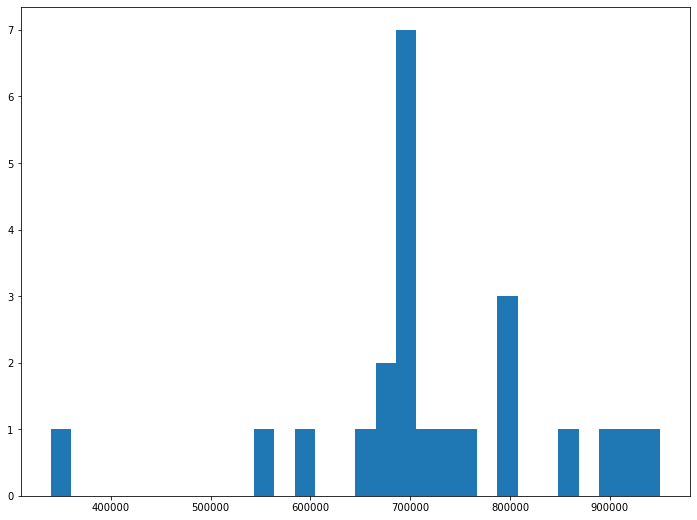

In [54]:
acton_2beds.price.hist(figsize=(12,9),grid=False, bins=30);